In [10]:
import os 
import zipfile
local_zip = 'D:/New folder/deeplearning/catsvsdogs/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('D:/New folder/deeplearning/catsvsdogs')
zip_ref.close()

In [13]:
base_dir = 'D:/New folder/deeplearning/catsvsdogs/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [14]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [15]:
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation cat images:',len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation cat images: 500


In [16]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows = 4 
ncols = 4 

pic_index = 0

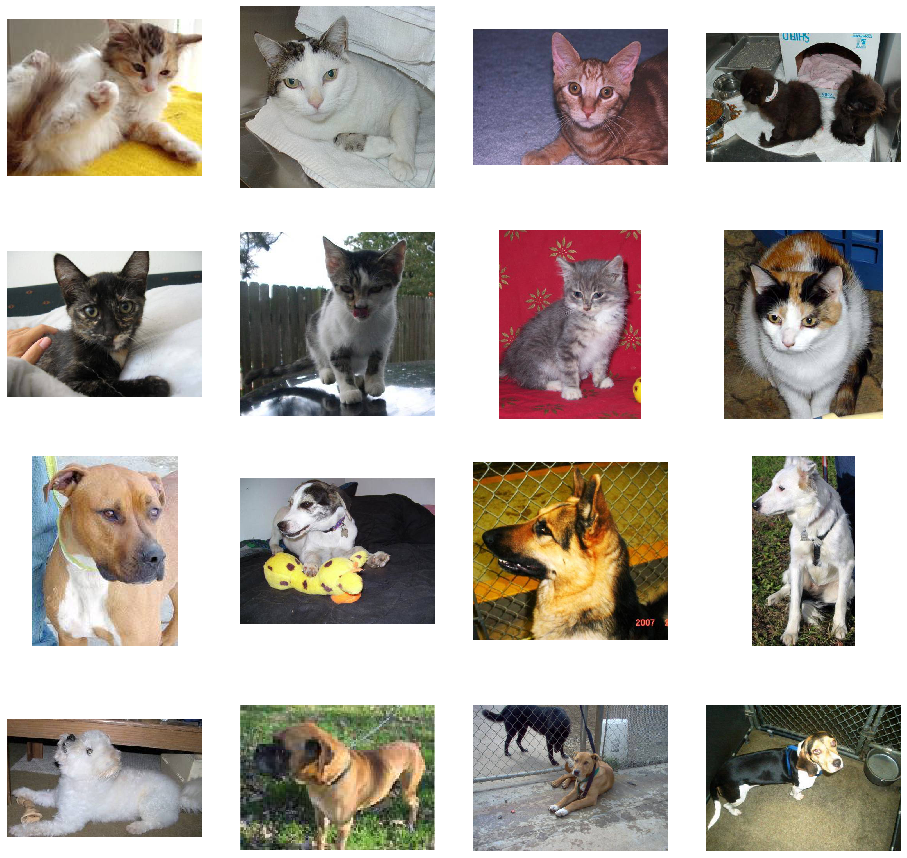

In [18]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i,img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    img =  mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [19]:
import tensorflow as tf 

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode = 'binary',
                                                       target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit(train_generator,
                   validation_data=validation_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_steps=50,
                   verbose=2)

Epoch 1/15
100/100 - 43s - loss: 0.8910 - accuracy: 0.5425 - val_loss: 0.6614 - val_accuracy: 0.6520
Epoch 2/15
100/100 - 29s - loss: 0.6466 - accuracy: 0.6550 - val_loss: 0.5828 - val_accuracy: 0.7020
Epoch 3/15
100/100 - 29s - loss: 0.5768 - accuracy: 0.7110 - val_loss: 0.5807 - val_accuracy: 0.7070
Epoch 4/15
100/100 - 30s - loss: 0.4992 - accuracy: 0.7555 - val_loss: 0.7207 - val_accuracy: 0.6610
Epoch 5/15
100/100 - 29s - loss: 0.4198 - accuracy: 0.8030 - val_loss: 0.6101 - val_accuracy: 0.6960
Epoch 6/15
100/100 - 29s - loss: 0.3439 - accuracy: 0.8520 - val_loss: 0.8845 - val_accuracy: 0.6520
Epoch 7/15
100/100 - 30s - loss: 0.2592 - accuracy: 0.8835 - val_loss: 0.8050 - val_accuracy: 0.7020
Epoch 8/15
100/100 - 31s - loss: 0.1670 - accuracy: 0.9320 - val_loss: 1.1710 - val_accuracy: 0.6800
Epoch 9/15
100/100 - 30s - loss: 0.1227 - accuracy: 0.9490 - val_loss: 1.1226 - val_accuracy: 0.6860
Epoch 10/15
100/100 - 30s - loss: 0.1010 - accuracy: 0.9675 - val_loss: 1.1878 - val_accura

C:\Users\shouv\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


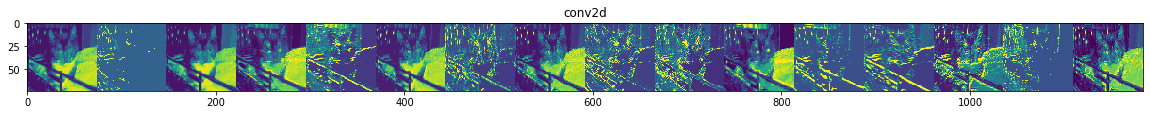

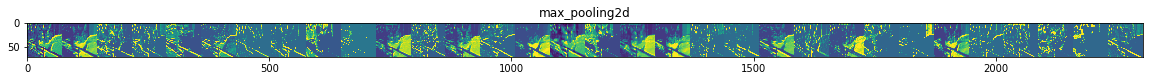

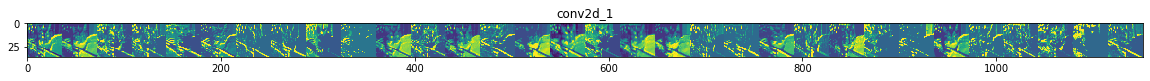

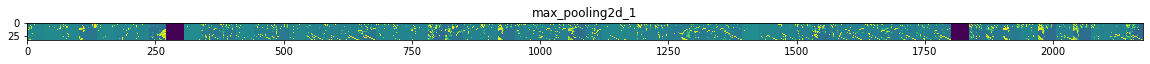

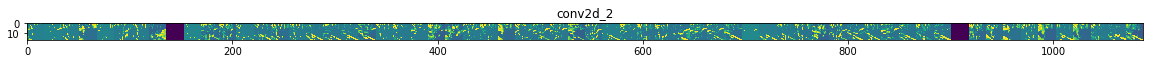

In [28]:
import numpy as np
import random 
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input,outputs = successive_outputs)
cat_img_files = [os.path.join(train_cats_dir,f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir,f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path,target_size=(150,150))

x = img_to_array(img)
x = x.reshape((1,)+x.shape)
x/=255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names,successive_feature_maps):
    if len(feature_map.shape)==4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size,size*n_features))
        
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x-=x.mean()
            x/=x.std()
            x*=64
            x+=128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size:(i+1)*size] = x
            
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'training and validation loss')

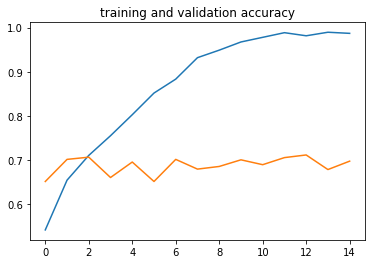

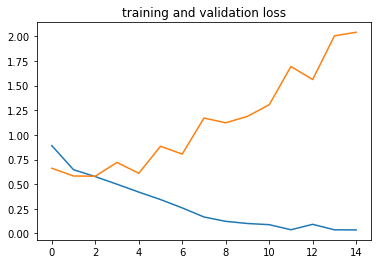

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training and validation loss')

In [37]:
#predictions
import cv2
import numpy as np
path = 'D:/New folder/deeplearning/catsvsdogs/dog.jpg'
img = cv2.imread(path)
img = cv2.resize(img,(150,150))
x = img
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
classes = model.predict(images,batch_size=10)
print(classes[0])
if classes[0]>0:
    print( " is a dog")
    
else:
    print(" is a cat")


[1.]
 is a dog
